In [5]:
import pandas as pd
import numpy as np
from py2neo import Graph, Node, Relationship
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def custom_func(elem):
    return(elem[1])

In [4]:
%%time 
df = pd.read_csv('C:\\Users\\nikita\\Downloads/soc-redditHyperlinks-title.tsv', delimiter='\t')

Wall time: 10.8 s


In [5]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


In [6]:
# len(file)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
mask = (df['TIMESTAMP'] > '2017-04-13 16:39:18')
file = df.loc[mask]
len(file)

11065

In [7]:
file.head(15)

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
3203,againstagainstmen,againstmensrights,1v1x0u,2017-04-27 15:53:56,-1,"94.0,82.0,0.81914893617,0.0,0.063829787234,0.1..."
23285,againstagainstmen,againstmensrights,20l834,2017-04-27 15:53:56,-1,"76.0,66.0,0.828947368421,0.0,0.0789473684211,0..."
47992,vetworship,pics,26nl38s,2017-04-27 19:52:51,1,"35.0,30.0,0.8,0.0,0.171428571429,0.17142857142..."
311639,shitnazissay,askanamerican,41ciph,2017-04-29 07:33:59,-1,"238.0,197.0,0.789915966387,0.0,0.0420168067227..."
340361,cammersfault,roadcam,4ac2vos,2017-04-21 01:29:19,1,"87.0,72.0,0.804597701149,0.0,0.0689655172414,0..."
340621,tonkahs,tifu,4aeh65s,2017-04-22 06:42:51,1,"53.0,47.0,0.792452830189,0.0,0.188679245283,0...."
347945,cammersfault,roadcam,4cj4kus,2017-04-21 01:29:19,1,"47.0,40.0,0.808510638298,0.0,0.127659574468,0...."
348193,blameamerica,news,4clwtt,2017-04-14 11:42:51,-1,"99.0,83.0,0.757575757576,0.0,0.0909090909091,0..."
366080,redditeconomics,news,4huroqs,2017-04-26 16:53:07,1,"83.0,70.0,0.807228915663,0.0,0.0722891566265,0..."
376301,bestofcuckculture,drama,4krjfos,2017-04-27 14:36:08,1,"86.0,76.0,0.790697674419,0.0,0.093023255814,0...."


In [8]:
%%time
u_source = file['SOURCE_SUBREDDIT'].unique().tolist()
u_target = file['TARGET_SUBREDDIT'].unique().tolist()
u_source.extend(u_target)
Vertices_list = list(dict.fromkeys(u_source))
Vertices_list.sort()
len(Vertices_list)

Wall time: 51 ms


5310

In [9]:
#creation of edge list

In [10]:
%%time
Edges_list = list(zip(file['SOURCE_SUBREDDIT'],file['TARGET_SUBREDDIT']))
Edges_list.sort()
Edges_unique = list(dict.fromkeys(Edges_list))

Wall time: 15 ms


In [11]:
# Creation of adjacency matrix and adjacency list
# Edges_unique = Edges_unique[:500]
# Vertices_list = Vertices_list[:500]

In [12]:
%%time
V = len(Vertices_list)
Adj_Mat = []
Adj_Mat = np.zeros((V,V),dtype=int)

Adj_list = []
for s in range(V):
    Adj_list.append([])

for i in Edges_unique:
    a = Vertices_list.index(i[0])
    b = Vertices_list.index(i[1])
    Adj_Mat[a][b]=1
    Adj_list[a].append(i[1])


Wall time: 957 ms


In [13]:
#calculate out degree

In [25]:
%%time
count_vertex = 0    
count = []
outdegree_sub = {}
for i in range(len(Adj_list)):
    count_vertex = len(Adj_list[i])
    a = [Vertices_list[i],count_vertex]
    count.append(a)
    outdegree_sub[Vertices_list[i]] = Adj_list[i]


Wall time: 8.99 ms


In [26]:
# count
# outdegree_sub

In [27]:
count.sort(key=custom_func,reverse=True)

In [28]:
count
count = count[:10]

In [29]:
popularName = [x[0] for x in count]
popularNo = [x[1] for x in count]

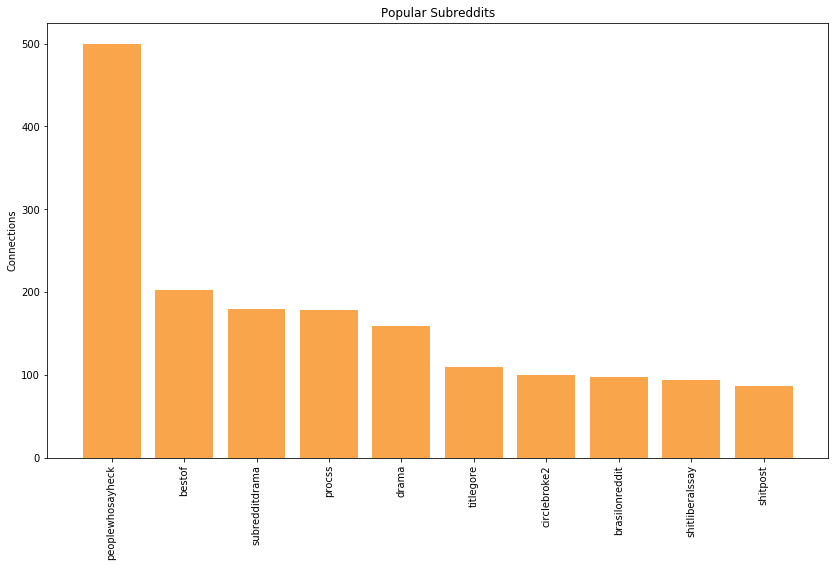

In [30]:
y_pos = np.arange(len(popularName))
plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, popularNo, align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, popularName,rotation='vertical')
plt.ylabel('Connections')
plt.title('Popular Subreddits')
plt.show()
# plt.savefig("Popular_subreddits",dpi=500)

In [31]:
outdegree_sub['bestof']

['2meirl4meirl',
 '4chan',
 'adviceanimals',
 'albania',
 'amadisasters',
 'amifreetogo',
 'anarcho_capitalism',
 'androidapps',
 'antitrumpalliance',
 'arduino',
 'argsociety',
 'art',
 'ask_politics',
 'askhistorians',
 'askhistory',
 'askmen',
 'askouija',
 'askreddit',
 'askscience',
 'atheism',
 'australia',
 'aww',
 'awwwtf',
 'badmathematics',
 'baseball',
 'basicincome',
 'bayarea',
 'beatles',
 'beholdthemasterrace',
 'bettercallsaul',
 'bettereveryloop',
 'biology',
 'bitcoinmarkets',
 'boardgames',
 'bodybuilding',
 'books',
 'britishsuccess',
 'calgaryflames',
 'canada',
 'casualiama',
 'catastrophicfailure',
 'cfb',
 'changemyview',
 'chicago',
 'comics',
 'completeanarchy',
 'conspiracy',
 'crappydesign',
 'cringe',
 'cringepics',
 'damnthatsinteresting',
 'dataisbeautiful',
 'depression',
 'discordapp',
 'diy',
 'dota2',
 'drugs',
 'eagles',
 'elitedangerous',
 'ems',
 'esist',
 'evilbuildings',
 'excons',
 'explainlikeiama',
 'explainlikeimfive',
 'fantasyfootball',
 'f

In [39]:
# popular among popular connections
popularName1 = []
commonCount = []
commonName = []
for s in popularName:
    common_sub = list(set(outdegree_sub[s]) & set(popularName))
    popularName1.append(s)
    commonCount.append(len(common_sub))
    commonName.append((common_sub))
    
print(popularName1)

['peoplewhosayheck', 'bestof', 'subredditdrama', 'procss', 'drama', 'titlegore', 'circlebroke2', 'brasilonreddit', 'shitliberalssay', 'shitpost']


In [33]:
print(commonCount)

[1, 0, 2, 0, 2, 1, 2, 0, 3, 0]


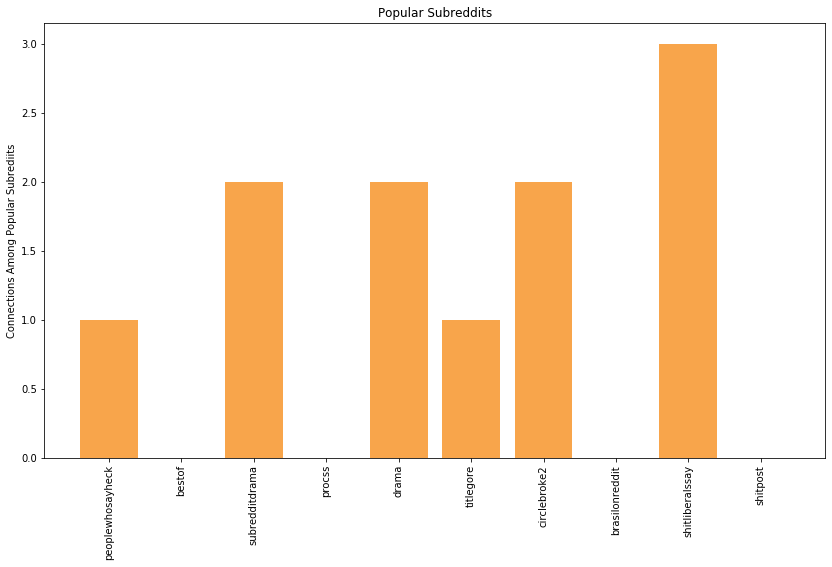

In [34]:
y_pos = np.arange(len(popularName1))
plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, commonCount, align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, popularName1,rotation='vertical')
plt.ylabel('Connections Among Popular Subrediits')
plt.title('Popular Subreddits')
plt.show()
# plt.savefig("Popular_subreddits",dpi=500)

In [36]:
popularName1

['peoplewhosayheck',
 'bestof',
 'subredditdrama',
 'procss',
 'drama',
 'titlegore',
 'circlebroke2',
 'brasilonreddit',
 'shitliberalssay',
 'shitpost']

In [40]:
commonName

[['subredditdrama'],
 [],
 ['circlebroke2', 'drama'],
 [],
 ['subredditdrama', 'circlebroke2'],
 ['shitliberalssay'],
 ['drama', 'bestof'],
 [],
 ['subredditdrama', 'circlebroke2', 'bestof'],
 []]

In [64]:
d3matrix = []
d3matrix = np.zeros((len(popularName1),len(popularName1)),dtype=int)
matrix_index = 0
for name in commonName:
    for name1 in name:
        a = popularName1.index(name1)
        d3matrix[matrix_index][a] = 1
        print(a)
    matrix_index = matrix_index+1

2
6
4
2
6
8
4
1
2
6
1


In [65]:
d3matrix

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [35]:
# Stroing Adj matrix and Adj list as csv

In [27]:
# np.savetxt('Adjacency_Matrix.csv',Adj_Mat,delimiter = ',')
# np.savetxt('Adjacency_list.csv',Adj_list,delimiter = ',')

In [28]:
#Triple-store query to be executed in Neo4j

In [29]:
# load csv from 'file:///soc-redditHyperlinks-title.tsv' as graph FIELDTERMINATOR '\t' create (node1:source{name:graph[0]})-[r:Sentiment {name:graph[4]}]-> (node2:target{name:graph[1]})

In [30]:
#insight - 1

In [31]:
#using edge_list for finding paths

In [32]:
#cycles(which are pure cycles)
origin_nodes = list(set(u_source).difference(u_target))
dest_nodes   = list(set(u_target).difference(u_source))
origin_nodes.sort()
dest_nodes.sort()
print(" no:of source nodes :",len(origin_nodes))
print(" no:of target nodes :",len(dest_nodes))

 no:of source nodes : 27187
 no:of target nodes : 0


In [33]:

def Vertices(node):
    for i in range(len(Vertices_list)):
        if node == Vertices_list[i]:
#             print(i)
            return i

def Matrix(index):
    for i in range(len(Adj_Mat[index])):
        if Adj_Mat[index][i]==1:
#             print(Vertices_list[i])
            return Vertices_list[i]


In [ ]:
%%time
src = origin_nodes[1]
trg = ''
path1 = [src]

for i in range(V):
    trg = Matrix(Vertices(src))
#     path1.append(src)
    path1.append(trg)
    src = trg
    try:
        b=path1.index(src)
    except ValueError:
        continue
#     if isinstance(b,int):
#         break
print(path1)

# for i in range(len(Vertices_list)):
#     if src == Vertices_list[i] : 
#         for j in range(len(Adj_Mat[i]):
#             if Adj_Mat[i][j] == 1 :
#                 path.append[[Vertices_listtices_list[i],Vertices_list[j]]]
#                 src = Vertices_list[j]

In [ ]:
# src = origin_nodes[38]
# trg = ''
# for i in Edges_unique :
#     if src == i[0] :
#         print(i)
#          trg = i[1]
#         for j in Edges_unique:
#             if trg == i[0]:
#                 print(j)
#                 src = trg
# #                 break
    

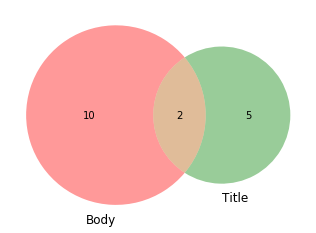

In [31]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (13000, 5, 2), set_labels = ('Body', 'Title'))
plt.show()

